**Assignment 6:
Convolutional Neural Network**

Sergio Orlando Alanís De La Rosa 2043932

Diego Castro Galindo 2109304

Sebastian Hernandez Renteria 2109140

Braulio Azael García Treviño 2043046

Miguel Angel Perez Luevano  2052579

**Career**: IB  
**Group**: 003  
**LMV:** N1


# **Libraries**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# TensorFlow / Keras (CNN + MNIST)
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Scikit-learn for feedforward model
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score


# **Data**

In [ ]:
# Load MNIST dataset using Keras
(train_data, train_labels), (test_data, test_labels) = mnist.load_data()

# Show dataset shapes
print("Training data shape:", train_data.shape)
print("Training labels shape:", train_labels.shape)
print("Test data shape:", test_data.shape)
print("Test labels shape:", test_labels.shape)


Training data shape: (60000, 28, 28)
Training labels shape: (60000,)
Test data shape: (10000, 28, 28)
Test labels shape: (10000,)


# **Data Preprocessing**

In [ ]:
#Rescale
train_data_cnn = train_data / 255.0
test_data_cnn = test_data / 255.0

#Add channel dimension
train_data_cnn = np.expand_dims(train_data_cnn, -1)
test_data_cnn = np.expand_dims(test_data_cnn, -1)

#OneHot labels
train_labels_cnn = to_categorical(train_labels)
test_labels_cnn = to_categorical(test_labels)


# **Model selection and training**

In [ ]:
mlp = MLPClassifier(
    hidden_layer_sizes=(128, 64),
    activation='relu',
    solver='adam',
    max_iter=20,
    verbose=False
)

mlp.fit(train_data_mlp, train_labels)


cnn_model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D((2,2)),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

cnn_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

cnn_model.summary()


history = cnn_model.fit(
    train_data_cnn,
    train_labels_cnn,
    epochs=5,
    batch_size=128,
    validation_split=0.1
)



/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 43s 99ms/step - accuracy: 0.8502 - loss: 0.5257 - val_accuracy: 0.9818 - val_loss: 0.0595
Epoch 2/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 39s 93ms/step - accuracy: 0.9787 - loss: 0.0700 - val_accuracy: 0.9832 - val_loss: 0.0533
Epoch 3/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 39s 93ms/step - accuracy: 0.9867 - loss: 0.0433 - val_accuracy: 0.9883 - val_loss: 0.0431
Epoch 4/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 39s 92ms/step - accuracy: 0.9910 - loss: 0.0314 - val_accuracy: 0.9898 - val_loss: 0.0408
Epoch 5/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 38s 91ms/step - accuracy: 0.9923 - loss: 0.0244 - val_accuracy: 0.9880 - val_loss: 0.0479


# **Model testing**

MLP Test Accuracy: 0.9772
313/313 - 2s - 7ms/step - accuracy: 0.9878 - loss: 0.0391
CNN Test Accuracy: 0.9878000020980835


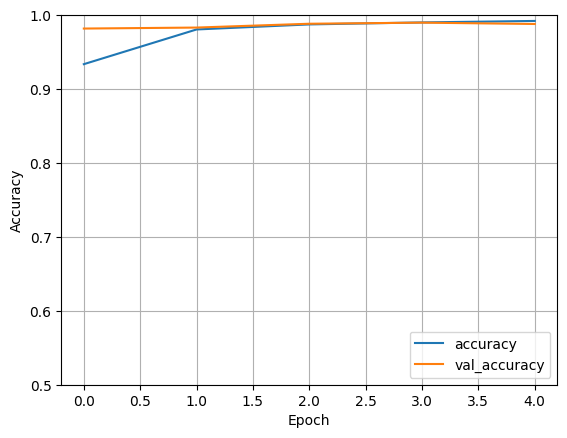

In [ ]:
mlp_predictions = mlp.predict(test_data_mlp)
mlp_test_accuracy = accuracy_score(test_labels, mlp_predictions)

print("MLP Test Accuracy:", mlp_test_accuracy)


test_loss, test_acc = cnn_model.evaluate(test_data_cnn, test_labels_cnn, verbose=2)
print("CNN Test Accuracy:", test_acc)



plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


# **5 Predictions**

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
Prediction: 9 | Actual: 9


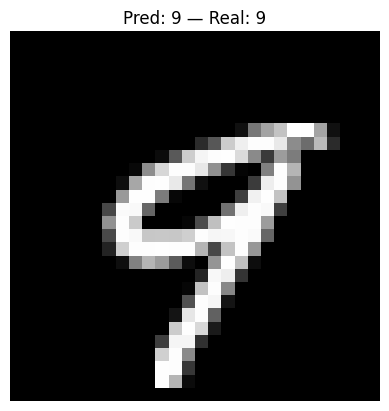

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Prediction: 7 | Actual: 7


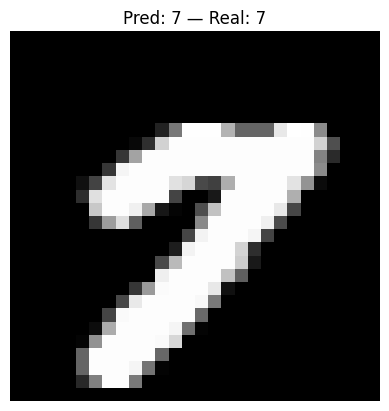

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Prediction: 1 | Actual: 1


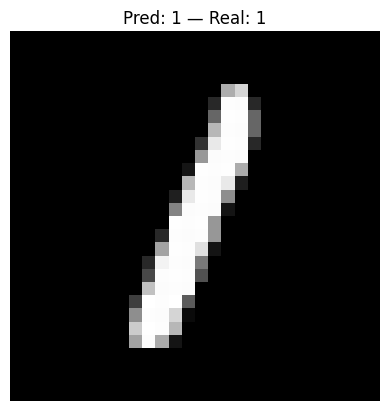

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Prediction: 6 | Actual: 6


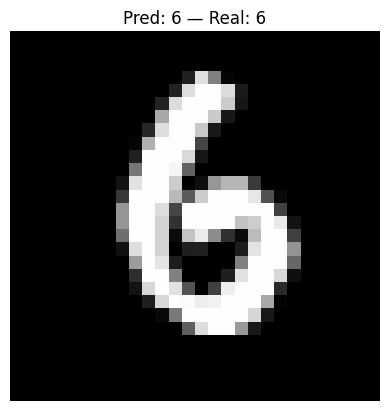

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Prediction: 6 | Actual: 6


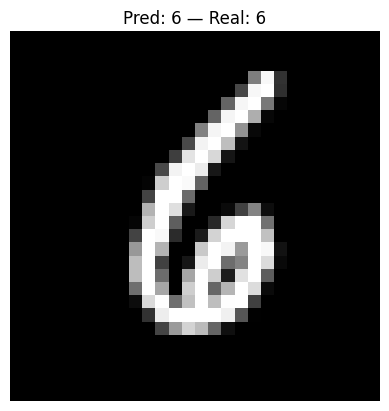

In [ ]:
for i in range(5):
    idx = np.random.randint(0, len(test_data))
    image = test_data_cnn[idx]

    prediction = cnn_model.predict(image.reshape(1,28,28,1))
    predicted_label = np.argmax(prediction)

    print(f"Prediction: {predicted_label} | Actual: {test_labels[idx]}")

    plt.imshow(test_data[idx], cmap='gray')
    plt.title(f"Pred: {predicted_label} — Real: {test_labels[idx]}")
    plt.axis('off')
    plt.show()
